In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from scipy.signal import butter, iirnotch, firwin, filtfilt, periodogram
from utils.signal_processing import *
import pyemgpipeline as pep

In [2]:
from process_data import *

In [3]:
sess3_data = 'test_sess3_data.txt'
sess3_metadata = 'test_sess3_metadata.txt'
cat_instances3 = data_from_files(sess3_data, sess3_metadata)

In [4]:
sess3_md_df = pd.read_csv(sess3_metadata,header=None)
sess3_md_df

,0,1
0,2.601756e+06,REST
1,2.601760e+06,CLENCH FIST
2,2.601761e+06,HOLD
3,2.601765e+06,STOP
4,2.601766e+06,REST
5,2.601770e+06,CLENCH FIST
6,2.601771e+06,HOLD
7,2.601775e+06,STOP
8,2.601776e+06,REST
9,2.601780e+06,CLENCH FIST


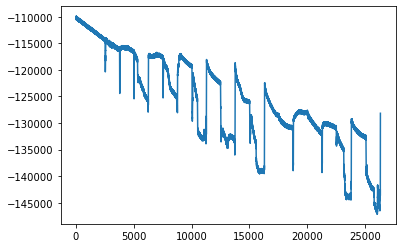

In [5]:
sess0_data = 'test_sess0_data.txt'
sess_0_df = pd.read_csv(sess0_data,header=None)
plt.plot(sess_0_df[2])

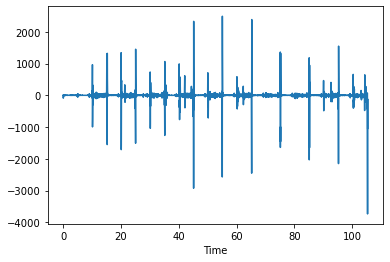

In [6]:
lap = tripolar_laplacian(sess_0_df[3],sess_0_df[2])
emg = process_signal(lap, 5, 50, 30)
emg.plot()

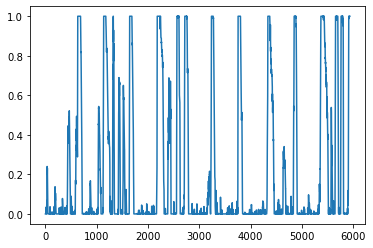

In [7]:
sess_3_df = pd.read_csv(sess3_data,header=None)
plt.plot(sess_3_df[8])

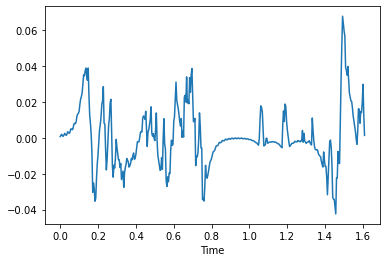

In [8]:
plot_emg(cat_instances3, 'HOLD', 0, 'e1')

In [9]:
sess0_data = 'test_sess0_data.txt'
sess0_metadata = 'test_sess0_metadata.txt'
cat_instances0 = data_from_files(sess0_data, sess0_metadata)

In [10]:
sess1_data = 'test_sess1_data.txt'
sess1_metadata = 'test_sess1_metadata.txt'
cat_instances1 = data_from_files(sess1_data, sess1_metadata)

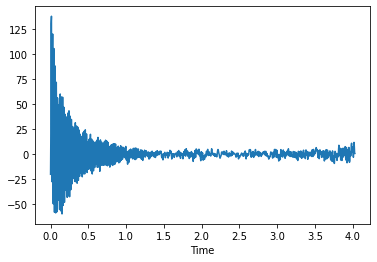

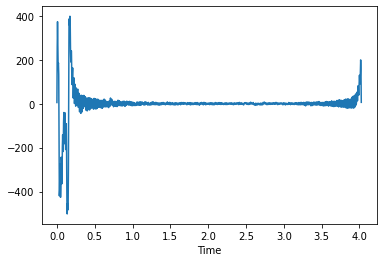

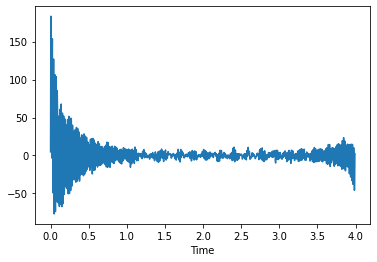

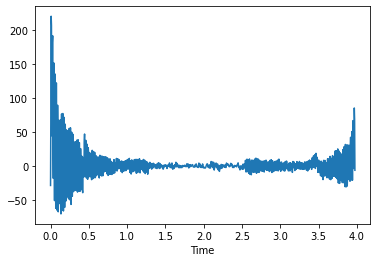

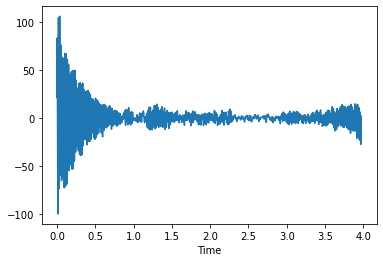

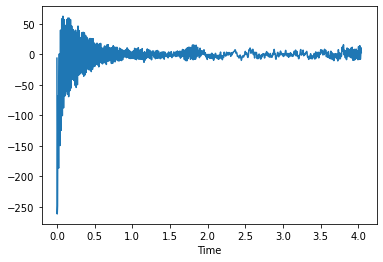

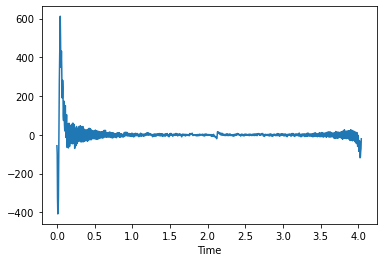

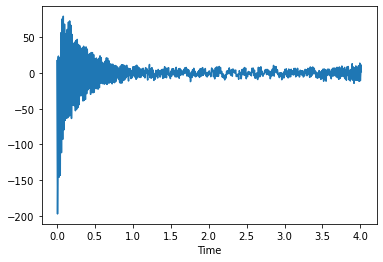

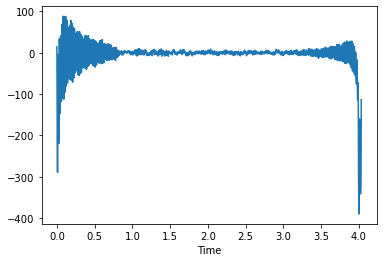

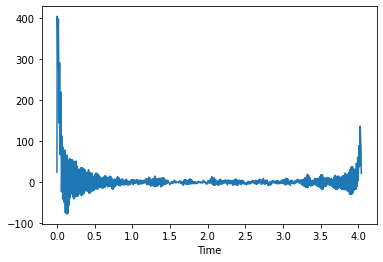

In [33]:
for i in range(10):
    plot_emg(cat_instances0, 'REST', i, 'e2',low=5, high=70, Q=60)

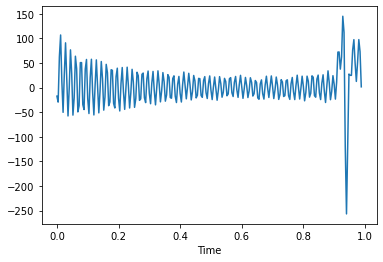

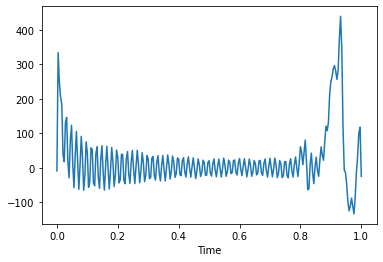

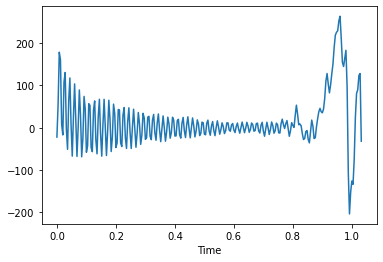

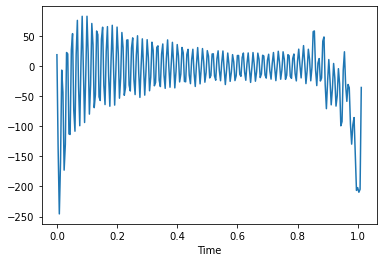

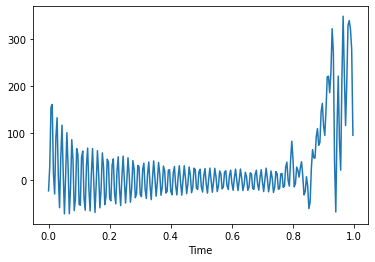

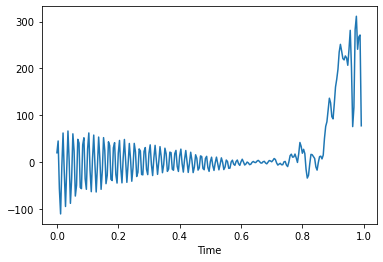

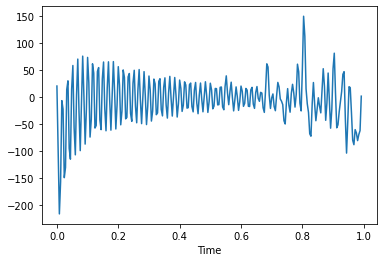

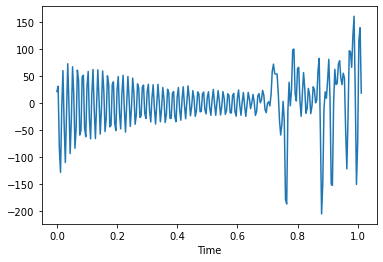

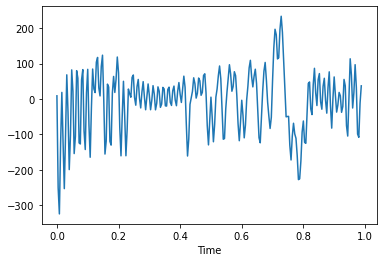

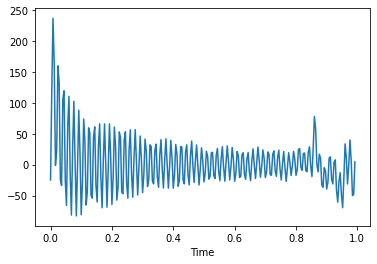

In [34]:
for i in range(10):
    emg_clench02 = plot_emg(cat_instances0, 'CLENCH', i, 'e2',low=5, high=70, Q=60)

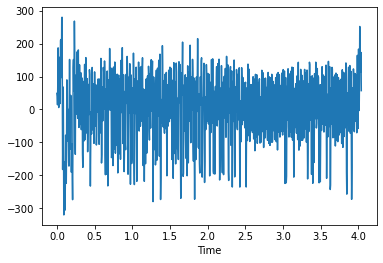

In [21]:
for i in range(1):
    emg_holdclench02 = plot_emg(cat_instances0, 'HOLD CLENCH', i, 'e2',low=5, hirgh=50, Q=0)

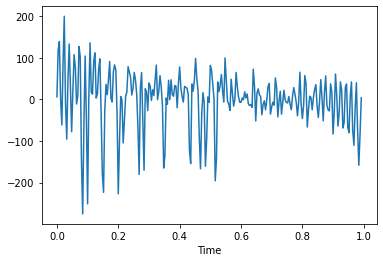

In [33]:
for i in range(1):
    emg_unclench02 = plot_emg(cat_instances0, 'STOP CLENCH', i, 'e2',low=5, high=124, Q=30)

In [18]:
from utils.features import *

In [19]:
from sklearn.decomposition import PCA

In [14]:
# must divide by time (number of seconds for some features)
def collect_feats(cat_instances,cat,num=10):
    feats = []
    for i in range(num):
        instance_feats = []
        emg_data = plot_emg(cat_instances, cat, i, 'e2', plot=False).data
        #instance_feats.append(root_mean_square(emg_data))
        #instance_feats.append(waveform_length(emg_data)/emg_data.shape[0])
        #instance_feats.append(zero_crossings(emg_data)/emg_data.shape[0])
        #wcs = calculate_wavelet_coefficients(emg_data)
        #pca = PCA(n_components=2, svd_solver='full')
        #feat = pca.fit_transform(wcs)
        #instance_feats.append(feat)
        #power, freqs = to_fdomain(data=emg_data, sampling_rate=250)
        f, Pxx = periodogram(emg_data,250)
        #pf = peak_frequencies(power, freqs)
        #meanf = mean_frequency(power, freqs)
        #medianf = median_frequency(power, freqs)
        instance_feats = calculate_average_power(Pxx, f, n=5)
        #instance_feats.append(meanf)
        feats.append(instance_feats)
    return feats

In [15]:
clench_feats0 = collect_feats(cat_instances0, cat='CLENCH')
clench_feats1 = collect_feats(cat_instances1, cat='CLENCH')

NameError: name 'to_fdomain' is not defined

In [16]:
rest_feats0 = collect_feats(cat_instances0, cat='REST')
rest_feats1 = collect_feats(cat_instances1, cat='REST')

NameError: name 'to_fdomain' is not defined

In [89]:
hold_feats0 = collect_feats(cat_instances0, cat='HOLD CLENCH')
hold_feats1 = collect_feats(cat_instances1, cat='HOLD CLENCH')

In [90]:
stop_feats0 = collect_feats(cat_instances0, cat='STOP CLENCH')
stop_feats1 = collect_feats(cat_instances1, cat='STOP CLENCH')

In [91]:
from sklearn import svm
X = rest_feats0 + clench_feats0
y = [0 for i in range(10)] + [1 for i in range(10)]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [92]:
clf.predict(rest_feats1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [96]:
clf.predict(clench_feats1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [310]:
l1 = [0,1,2]
l2 = [3,4,5]
l3 = l1+l2
l3

[0, 1, 2, 3, 4, 5]

In [314]:
[0 for i in range(10)] + [1 for i in range(10)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]